# New York City Taxi Trip Duration Prediction

## Preparation

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

https://www.kaggle.com/competitions/nyc-taxi-trip-duration

### Load dataset

In [3]:
df = pd.read_csv('/content/Drive/MyDrive/dibimbing/Special Class 6/HW_data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### Correcting data type

In [4]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [5]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

In [6]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['date'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,date,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016,3,14,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016,6,12,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016,1,19,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016,4,6,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016,3,26,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,2016,4,8,13
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,2016,1,10,7
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,2016,4,22,6
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,2016,1,5,15


## Data Cleaning

### Handling Missing Value

In [ ]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Handling Duplicated Value

In [ ]:
df.duplicated().sum()

0

## Data Understanding

### Multicollinearity Check

<Axes: >

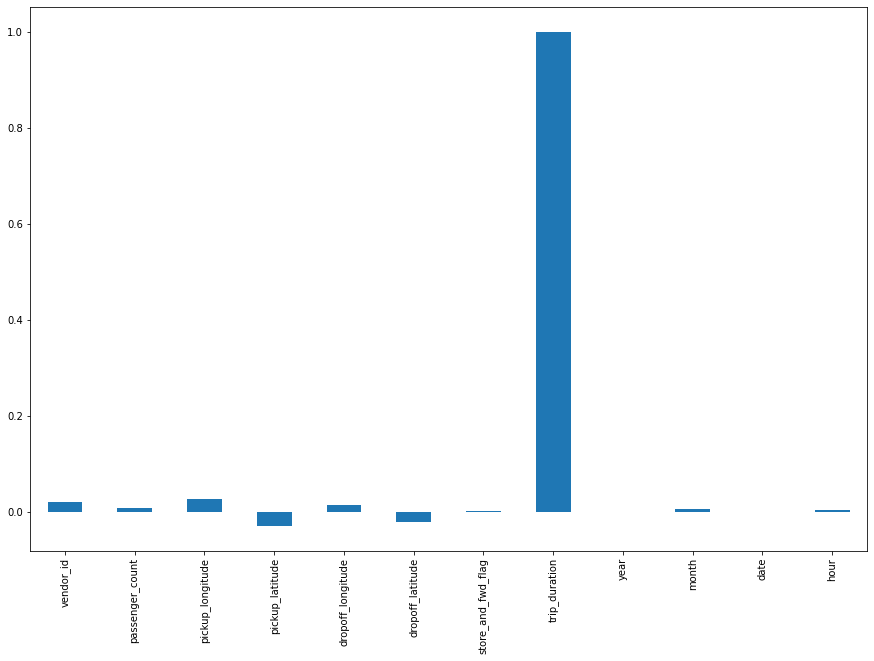

In [ ]:
df.corr()['trip_duration'].plot(kind='bar', figsize = (15, 10))

## Data Processing

### Drop Variable

In [7]:
df = df.drop(['id', 'passenger_count', 'pickup_datetime', 'dropoff_datetime'], axis=1)

### Remove Outlier

In [8]:
def remove_outlier(data, column):
  for i in column:
    q75 = np.percentile(data[i], 75)
    q25 = np.percentile(data[i], 25)
    intr_qr = q75-q25
    
    max = q75+(1.5*intr_qr)      
    min = q25-(1.5*intr_qr)

    print('min: ', min, 'max: ',max)
    data = data[((data[i]>= min) & (data[i] <= max))]

  return data 
  

In [9]:
df_outlier = df.copy()

column = df_outlier.columns
df_outlier = remove_outlier(df_outlier, column)
df_outlier = remove_outlier(df_outlier, column)
df_outlier = remove_outlier(df_outlier, ['trip_duration'])

min:  -0.5 max:  3.5
min:  -74.02867126464847 max:  -73.93052673339841
min:  40.69478416442871 max:  40.81076622009277
min:  -74.031967163086 max:  -73.92424011230463
min:  40.69005203247069 max:  40.81709671020509
min:  0.0 max:  0.0
min:  -454.0 max:  1746.0
min:  2016.0 max:  2016.0
min:  -2.5 max:  9.5
min:  -14.5 max:  45.5
min:  -6.0 max:  34.0
min:  -0.5 max:  3.5
min:  -74.02462005615237 max:  -73.93886566162107
min:  40.69740104675293 max:  40.80920219421387
min:  -74.0266914367676 max:  -73.93425369262692
min:  40.69370079040526 max:  40.8142604827881
min:  0.0 max:  0.0
min:  -406.5 max:  1645.5
min:  2016.0 max:  2016.0
min:  -2.5 max:  9.5
min:  -14.5 max:  45.5
min:  -6.0 max:  34.0
min:  -395.0 max:  1621.0


### Data Scaling

In [10]:
X = df_outlier.drop(['trip_duration'], axis=1)
y = df_outlier[['trip_duration']]

scaler = StandardScaler()
X_scale_stand = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale_stand, y, test_size=0.25, random_state=42)

y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

In [11]:
list_model = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()   
    ]

In [12]:
def modeling_scaled(X_train, X_test, y_train, y_test, list_model):
  
  result = pd.DataFrame(columns = ['Dataset', 'Method','RMSE', 'MAE', 'MAPE'])

  for model in list_model:
      model.fit(X_train,y_train)
      y_pred = model.predict(X_train)
      
      method = str(type(model)).split('.')[-1][:-2]

      RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
      MAE = mean_absolute_error(y_train, y_pred)
      MAPE = mean_absolute_percentage_error(y_train, y_pred)
      
      result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

      y_pred = model.predict(X_test)
      
      method = str(type(model)).split('.')[-1][:-2]

      RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
      MAE = mean_absolute_error(y_test, y_pred)
      MAPE = mean_absolute_percentage_error(y_test, y_pred)

      result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

  print(result)

## Modelling

In [ ]:
modeling_scaled(X_train, X_test, y_train, y_test, list_model)

<ipython-input-13-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-13-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-13-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-13-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

  Dataset                     Method        RMSE         MAE      MAPE
0   Train      DecisionTreeRegressor    1.096226    0.005819  0.000015
1    Test      DecisionTreeRegressor  282.213846  205.676069  0.472341
2   Train      RandomForestRegressor   73.885121   54.286943  0.140547
3    Test      RandomForestRegressor  197.295659  146.032598  0.370847
4   Train  GradientBoostingRegressor  273.307641  216.437077  0.707218
5    Test  GradientBoostingRegressor  273.250532  216.437079  0.695280


<ipython-input-13-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


### Cross Validation

In [ ]:
from sklearn.metrics import make_scorer

model = DecisionTreeRegressor().fit(X_train,y_train)

mse_scores = cross_val_score(model, X_scale_stand, y, cv=8, scoring='neg_mean_squared_error')

rmse_scores = (-mse_scores)**0.5
print(f'Mean RMSE: {rmse_scores.mean():.3f}')
print(f'Standard deviation of RMSE: {rmse_scores.std():.3f}')

Mean RMSE: 280.864
Standard deviation of RMSE: 0.638


In [ ]:
from sklearn.metrics import make_scorer

model = RandomForestRegressor().fit(X_train,y_train)

mse_scores = cross_val_score(model, X_scale_stand, y, cv=8, scoring='neg_mean_squared_error')

rmse_scores = (-mse_scores)**0.5
print(f'Mean RMSE: {rmse_scores.mean():.3f}')
print(f'Standard deviation of RMSE: {rmse_scores.std():.3f}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
from sklearn.metrics import make_scorer

model = GradientBoostingRegressor().fit(X_train,y_train)

mse_scores = cross_val_score(model, X_scale_stand, y, cv=8, scoring='neg_mean_squared_error')

rmse_scores = (-mse_scores)**0.5
print(f'Mean RMSE: {rmse_scores.mean():.3f}')
print(f'Standard deviation of RMSE: {rmse_scores.std():.3f}')

### Hyperparameter Tuning

#### Decision Tree

In [ ]:
param_grid = [
    {
    'max_features': [1, 5, 10, 15, 20, 30], 
    'max_depth': [1, 5, 10, 15, 20, 40, None]
     }
]

model = DecisionTreeRegressor(random_state = 42)

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

DecisionTreeRegressor(max_depth=15, max_features=10, random_state=42)

In [ ]:
result = pd.DataFrame(columns = ['Dataset', 'Method','RMSE', 'MAE', 'MAPE'])

model = DecisionTreeRegressor(max_features=10, max_depth=15, random_state=42).fit(X_train,y_train)

y_pred = model.predict(X_train)
      
method = str(type(model)).split('.')[-1][:-2]

RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
MAE = mean_absolute_error(y_train, y_pred)
MAPE = mean_absolute_percentage_error(y_train, y_pred)
      
result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

In [ ]:
print(result)

  Dataset                 Method        RMSE         MAE      MAPE
0   Train  DecisionTreeRegressor  217.693326  164.610583  0.502806


In [ ]:
importances = model.feature_importances_
print('Feature importances:', importances)

Feature importances: [0.00045289 0.15174849 0.41012613 0.12017692 0.24012957 0.
 0.         0.00449416 0.00408989 0.06878196]


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176127 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1176127 non-null  int64  
 1   pickup_longitude    1176127 non-null  float64
 2   pickup_latitude     1176127 non-null  float64
 3   dropoff_longitude   1176127 non-null  float64
 4   dropoff_latitude    1176127 non-null  float64
 5   store_and_fwd_flag  1176127 non-null  int64  
 6   year                1176127 non-null  int64  
 7   month               1176127 non-null  int64  
 8   date                1176127 non-null  int64  
 9   hour                1176127 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 98.7 MB


Menggunakan cross validation dan hyperparameter tuning dapat meningkatkan kualitas model sehingga nilai RMSE dan MAE berkurang menjadi masing-masing 217 dan 164. Kesalahan dalam memprediksi trip duration hanya 2.7 menit. 

Berikut merupakan nilai feature importances dari setiap features yang paling mempengaruhi trip duration:
1. pickup_latitude = 0.41
2. dropoff_latitude = 0.24
3. pickup_longitude = 0.15
4. dropoff_longitude = 0.12

Dapat diartikan bahwa titik penjemputan dan penurunan penumpang merupakan features yang paling mempengaruhi trip duration. Adapaun vendor dan store and forward flag serta waktu penjemputan tidak memberikan pengaruh yang besar terhadap trip duration


#### Random Forest

In [ ]:
param_grid = [
    {
    'max_features': [1, 5, 10, 15, 20, 30], 
    'max_depth': [1, 5, 10, 15, 20, 40, None]
     }
]

model = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
result = pd.DataFrame(columns = ['Dataset', 'Method','RMSE', 'MAE', 'MAPE'])

model = RandomForestRegressor(max_features=10, max_depth=15, random_state=42).fit(X_train,y_train)

y_pred = model.predict(X_train)
      
method = str(type(model)).split('.')[-1][:-2]

RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
MAE = mean_absolute_error(y_train, y_pred)
MAPE = mean_absolute_percentage_error(y_train, y_pred)
      
result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

In [ ]:
print(result)

In [ ]:
importances = model.feature_importances_
print('Feature importances:', importances)

In [ ]:
X.info()

#### Gradient Boost

In [ ]:
param_grid = [
    {
    'max_features': [1, 5, 10, 15, 20, 30], 
    'max_depth': [1, 5, 10, 15, 20, 40, None]
     }
]

model = GradientBoostingRegressor(random_state = 42)

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
result = pd.DataFrame(columns = ['Dataset', 'Method','RMSE', 'MAE', 'MAPE'])

model = GradientBoostingRegressor(max_features=10, max_depth=15, random_state=42).fit(X_train,y_train)

y_pred = model.predict(X_train)
      
method = str(type(model)).split('.')[-1][:-2]

RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
MAE = mean_absolute_error(y_train, y_pred)
MAPE = mean_absolute_percentage_error(y_train, y_pred)
      
result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

In [ ]:
print(result)

In [ ]:
importances = model.feature_importances_
print('Feature importances:', importances)

In [ ]:
X.info()